In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy as pt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 5/Wage.csv')
print(df)

      year  age      sex            maritl      race        education  \
0     2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1     2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2     2003   45  1. Male        2. Married  1. White  3. Some College   
3     2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4     2005   50  1. Male       4. Divorced  1. White       2. HS Grad   
...    ...  ...      ...               ...       ...              ...   
2995  2008   44  1. Male        2. Married  1. White  3. Some College   
2996  2007   30  1. Male        2. Married  1. White       2. HS Grad   
2997  2005   27  1. Male        2. Married  2. Black     1. < HS Grad   
2998  2005   27  1. Male  1. Never Married  1. White  3. Some College   
2999  2009   55  1. Male      5. Separated  1. White       2. HS Grad   

                  region        jobclass          health health_ins   logwage  \
0     2. Middle Atlantic   1. Industrial  

Degree: 1, MSE: 1675.0142380530044
Degree: 2, MSE: 1599.5982268539044
Degree: 3, MSE: 1594.7262162597287
Degree: 4, MSE: 1593.9141039223725
Degree: 5, MSE: 1595.433131058861
Degree: 6, MSE: 1594.9304381159777
Degree: 7, MSE: 1598.9132882547674
Degree: 8, MSE: 1599.5001194569413
Degree: 9, MSE: 1599.4216396016136


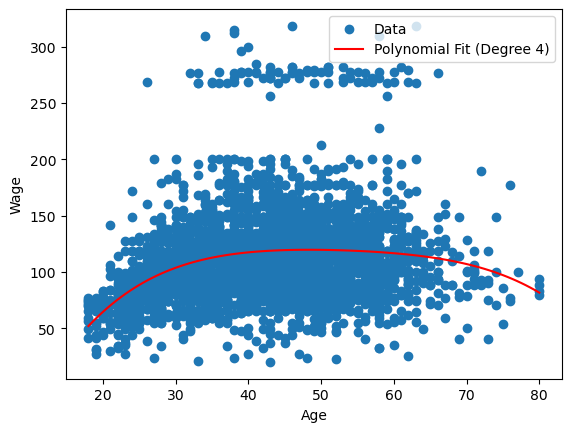

In [11]:
#PROBLEM 1 PART A
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


# Extract relevant columns
age = df['age'].values
wage = df['wage'].values

# Define a function to perform polynomial regression with cross-validation
def poly_reg(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = -cross_val_score(model, age.reshape(-1, 1), wage, scoring='neg_mean_squared_error', cv=5)
    return scores.mean()

# Find the optimal degree
degrees = np.arange(1, 10)
mse_scores = [poly_reg(degree) for degree in degrees]

# Print MSE scores for different polynomial degrees
for degree, mse_score in zip(degrees, mse_scores):
    print(f'Degree: {degree}, MSE: {mse_score}')

# Select the degree with the minimum cross-validated MSE
optimal_degree = degrees[np.argmin(mse_scores)]

# Fit the final model with the optimal degree using the entire dataset
final_model = make_pipeline(PolynomialFeatures(optimal_degree), LinearRegression())
final_model.fit(age.reshape(-1, 1), wage)

# Plot the data and the single polynomial fit line
plt.scatter(age, wage, label='Data')
age_range = np.linspace(age.min(), age.max(), 100).reshape(-1, 1)
plt.plot(age_range, final_model.predict(age_range), label=f'Polynomial Fit (Degree {optimal_degree})', color='red')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()
plt.show()

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

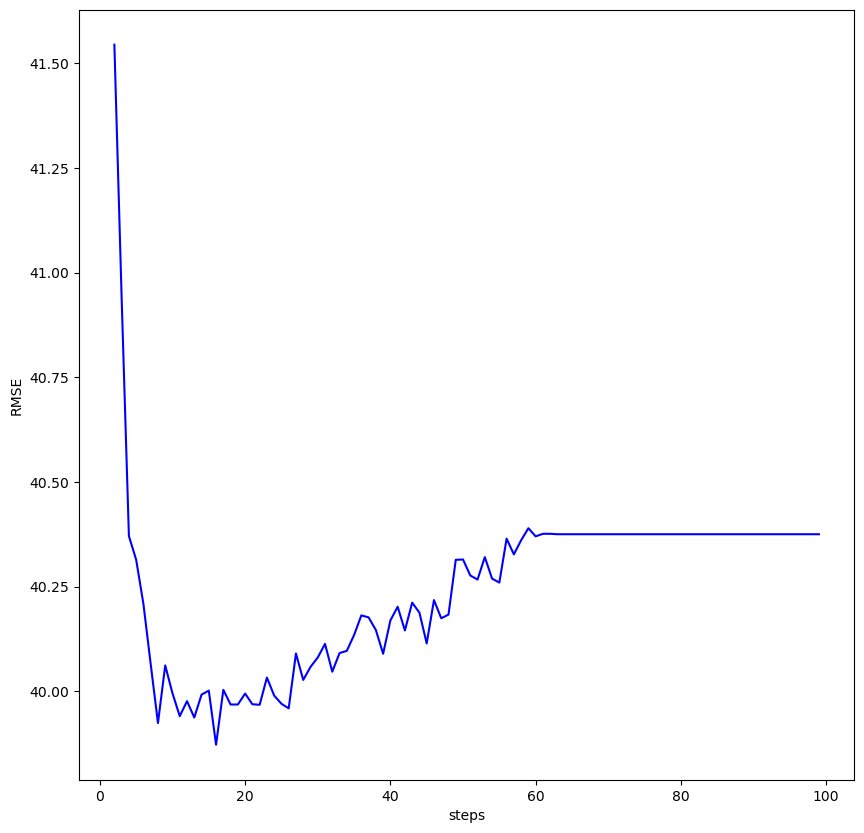

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Min RMSE : 39.872054703507914
Steps   : 16


/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

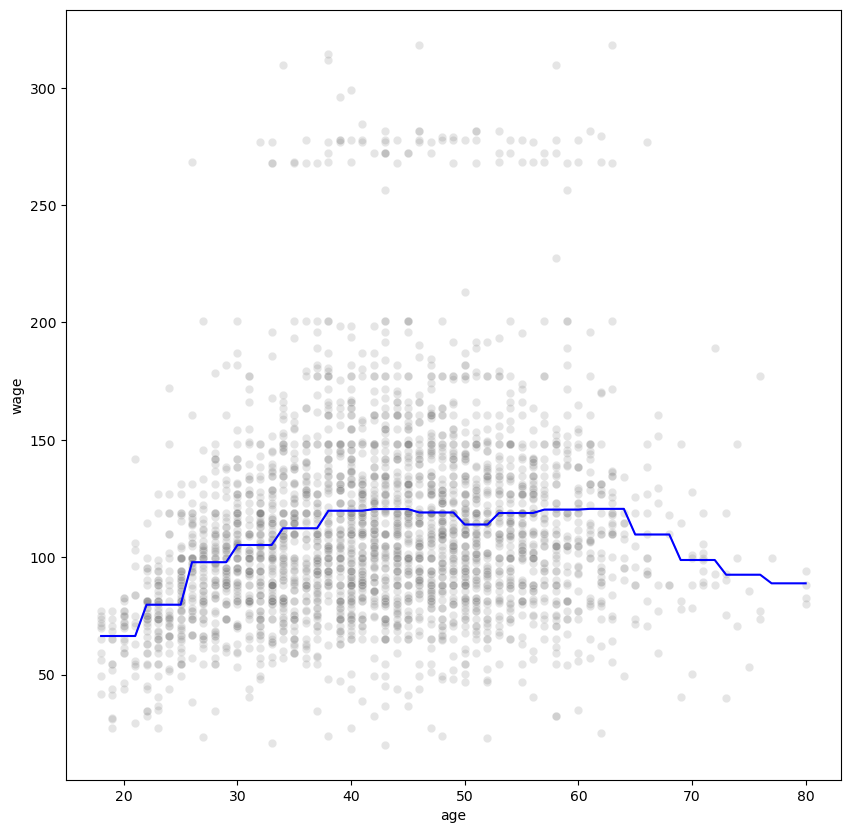

In [13]:
#PROBLEM 1 PART B

#create cross validation function
def ols_cv(formula, X, y, k):
    
    # Split dataset into k-folds
    X_folds = np.array(np.array_split(X, k))
    y_folds = np.array(np.array_split(y, k))
    
    RMSEs = []
    for f in np.arange(len(X_folds)):
        # Create training and test sets
        X_test  = X_folds[f]
        y_test  = y_folds[f]
        X_train = np.delete(X_folds, f, 0).reshape(-1, X_folds.shape[-1])
        y_train = np.delete(y_folds, f, 0).reshape(-1, 1)
        
        # Fit model
        model = sm.OLS(y_train, X_train).fit()
        # Measure MSE
        y_hat = model.predict(X_test)
        RMSEs += [np.sqrt(metrics.mean_squared_error(y_test, y_hat))]
    return (np.mean(RMSEs), formula)

#Find the ideal number of steps for the function
results = [] 
for steps in np.arange(2,100):
    # Segment data into 4 segments by age
    cuts = pd.cut(df['age'], steps)
    X = np.asarray(pd.get_dummies(cuts))
    y = np.asarray(df['wage'])
    results += [(ols_cv(f, X, y, 10)[0], steps)]
    
# Plot the results
data = pd.DataFrame({'RMSE': [r[0] for r in results],
                   'steps': [r[1] for r in results]})   
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x='steps', y='RMSE', data=data, color='b', ax=ax)
plt.show();

# Choose model
print('Min RMSE : {}'.format(min(results)[0]))
print('Steps   : {}'.format(min(results)[1]))


#Plot the best model
steps = min(results)[1]

# Segment data into 4 segments by age
cuts = pd.cut(df['age'], steps)
X = np.asarray(pd.get_dummies(cuts))
y = np.asarray(df['wage'])

# Fit logistic regression model
model = sm.OLS(y, X).fit(disp=0)
y_hat = model.predict(X)


# Setup axes
fig, ax = plt.subplots(figsize=(10,10))

# Plot datapoints
sns.scatterplot(x='age', y='wage',
                color='tab:gray',
                alpha=0.2,
                ax=ax,
                data=pd.concat([df['age'], df['wage']], axis=1));

# Plot estimated f(x)
sns.lineplot(x=df['age'], y=y_hat, ax=ax, color='blue')
plt.show();

In [4]:
#Change mdev to qualitative medv_yn

bos_df = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 5/Boston.csv')

medv = bos_df['medv'].to_numpy()
def medv_change(x):
    if x > np.median(medv):
        x = 1
        return x
    if x <= np.median(medv):
        x = 0
        return x
new_medv_col = bos_df['medv'].apply(medv_change)
bos_df['medv'] = new_medv_col

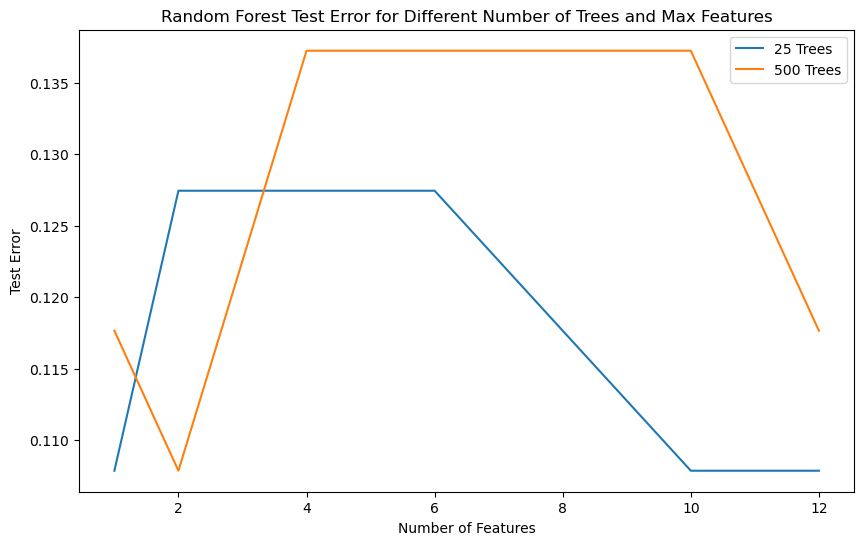

In [5]:
#PROBLEM 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Set X and y values
X = bos_df.drop(columns=['medv'])
y = bos_df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train Random Forests with different parameters
def train_random_forest(n_trees, max_features):
    rf = RandomForestClassifier(n_estimators=n_trees, max_features=max_features, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Create a range of values for number of trees and max features
trees_range = [25, 500]
max_features_range = [1, 2, 4, 6, 8, 10, 12]

# Create a plot to display the test error
plt.figure(figsize=(10, 6))

for n_trees in trees_range:
    accuracies = []
    for max_features in max_features_range:
        accuracy = train_random_forest(n_trees, max_features)
        accuracies.append(1 - accuracy)  # Convert accuracy to error rate

    plt.plot(max_features_range, accuracies, label=f'{n_trees} Trees')

plt.title('Random Forest Test Error for Different Number of Trees and Max Features')
plt.xlabel('Number of Features')
plt.ylabel('Test Error')
plt.legend()
plt.show()

In [15]:
#PROBLEM 3 PART A

car_df = pd.read_csv('/Users/kyliehoar/Downloads/CS4342/Assignment 5/Carseats.csv')

def shelveloc_change(x):
    if x == 'Good':
        x = 2
        return x
    if x == 'Medium':
        x = 1
        return x
    if x == 'Bad':
        x = 0
        return x
new_shelve_col = car_df['ShelveLoc'].apply(shelveloc_change)
car_df['ShelveLoc'] = new_shelve_col

def col_change(x):
    if x == 'Yes':
        x = 1
        return x
    if x == 'No':
        x = 0
        return x
new_urban_col = car_df['Urban'].apply(col_change)
car_df['Urban'] = new_urban_col

new_us_col = car_df['US'].apply(col_change)
car_df['US'] = new_us_col

#split data into training and test
X = car_df.drop(columns='Sales')
y = car_df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree:
|--- ShelveLoc <= 1.50
|   |--- Price <= 125.50
|   |   |--- Age <= 49.50
|   |   |   |--- Price <= 105.50
|   |   |   |   |--- ShelveLoc <= 0.50
|   |   |   |   |   |--- Unnamed: 0 <= 184.50
|   |   |   |   |   |   |--- Price <= 88.50
|   |   |   |   |   |   |   |--- Population <= 376.00
|   |   |   |   |   |   |   |   |--- value: [9.32]
|   |   |   |   |   |   |   |--- Population >  376.00
|   |   |   |   |   |   |   |   |--- value: [11.67]
|   |   |   |   |   |   |--- Price >  88.50
|   |   |   |   |   |   |   |--- Advertising <= 16.00
|   |   |   |   |   |   |   |   |--- Urban <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [9.01]
|   |   |   |   |   |   |   |   |--- Urban >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [9.14]
|   |   |   |   |   |   |   |--- Advertising >  16.00
|   |   |   |   |   |   |   |   |--- value: [8.55]
|   |   |   |   |   |--- Unnamed: 0 >  184.50
|   |   |   |   |   |   |--- Education <= 16.50
|   |   |   |   |   |   |   |

<Figure size 2000x1000 with 0 Axes>

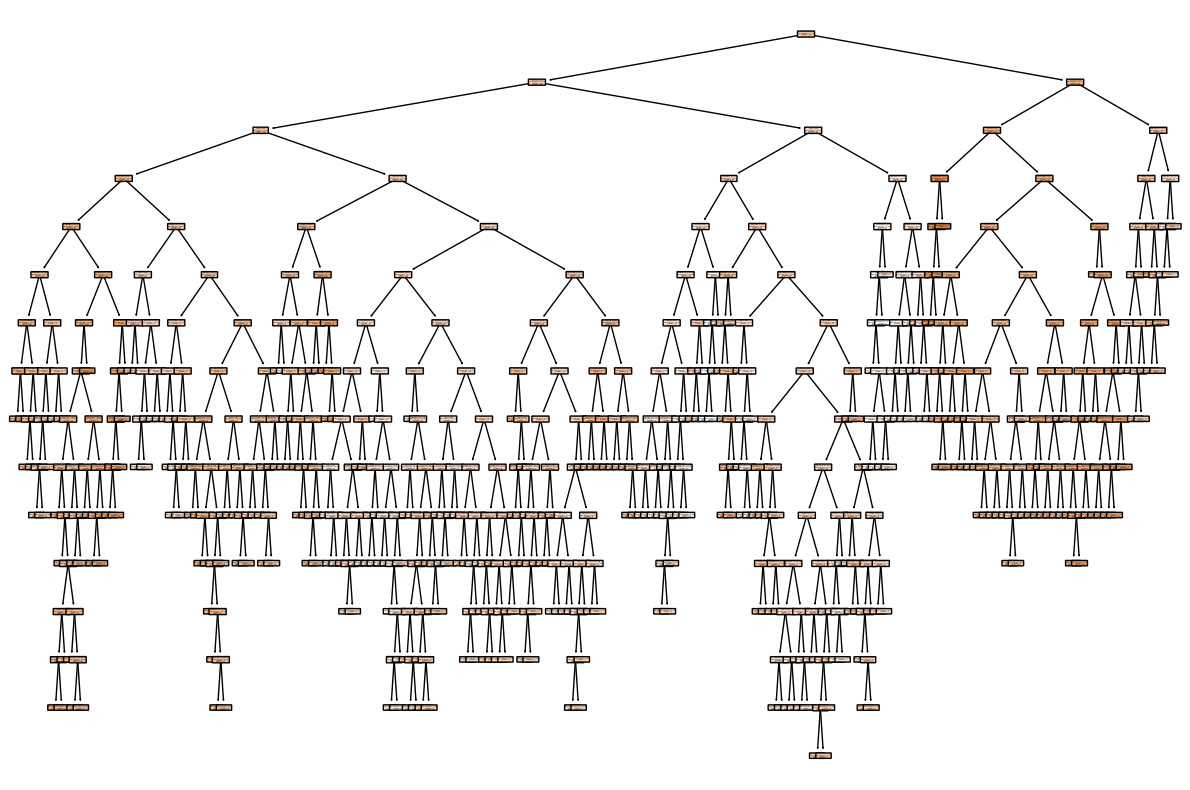

Test Mean Squared Error: 5.762339999999999


In [17]:
#PROBLEM 3 PART B
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.tree import plot_tree

reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree_text = export_text(reg_tree, feature_names=list(X.columns))
print("Decision Tree:")
print(tree_text)

plt.figure(figsize=(15, 10))
plot_tree(reg_tree, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

y_pred = reg_tree.predict(X_test)

# Calculate test mean squared error
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [8]:
#PROBLEM 3 PART C

# Create a decision tree regressor
reg_tree = DecisionTreeRegressor(random_state=42)

# Define a parameter grid for grid search
param_grid = {
    'max_depth': np.arange(1, 21),
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(reg_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
print(best_max_depth)

# Fit a decision tree regressor with the best hyperparameters
pruned_reg_tree = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
pruned_reg_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = pruned_reg_tree.predict(X_test)

# Calculate test mean squared error for the pruned tree
test_mse_pruned = mean_squared_error(y_test, y_pred_pruned)
print(f"Test Mean Squared Error (Pruned Tree): {test_mse_pruned}")

7
Test Mean Squared Error (Pruned Tree): 5.549344405312754


Test Mean Squared Error: 3.4703787124999996
Feature Importances:
        Feature  Importance
5         Price    0.296596
6     ShelveLoc    0.252724
7           Age    0.109815
3   Advertising    0.102709
1     CompPrice    0.083914
2        Income    0.043925
0    Unnamed: 0    0.038126
4    Population    0.032751
8     Education    0.030062
9         Urban    0.005189
10           US    0.004190


<Axes: >

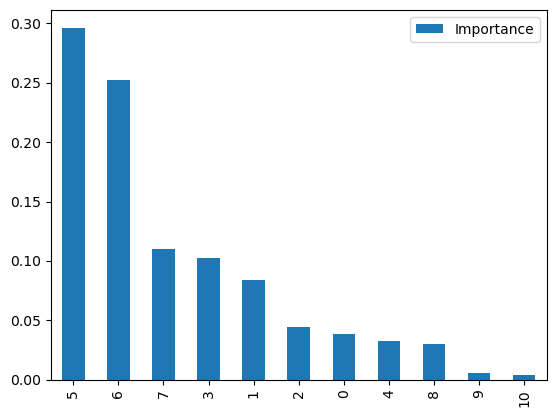

In [9]:
#PROBLEM 3 PART D
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

bag_reg = BaggingRegressor(random_state=42)
bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)

# Calculate test mean squared error
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

# Get feature importances from the Bagging Regressor
feature_importances = np.mean([tree.feature_importances_ for tree in bag_reg.estimators_], axis=0)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# plot feature importance
feature_importance_df.plot.bar()

Test Mean Squared Error: 3.233815144749999
Test Mean Squared Error Sqrt: 3.233815144749999
Test Mean Squared Error Log2: 3.233815144749999
Feature: 0, Score: 0.04051
Feature: 1, Score: 0.08484
Feature: 2, Score: 0.04629
Feature: 3, Score: 0.08195
Feature: 4, Score: 0.03415
Feature: 5, Score: 0.29624
Feature: 6, Score: 0.26485
Feature: 7, Score: 0.11688
Feature: 8, Score: 0.02542
Feature: 9, Score: 0.00509
Feature: 10, Score: 0.00377


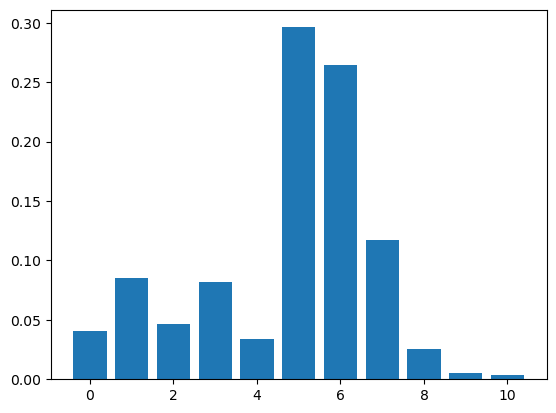

In [10]:
#PROBLEM 3 PART E
from sklearn.ensemble import RandomForestRegressor

reg_forest = RandomForestRegressor(n_estimators=100, random_state=42)
reg_forest2 = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
reg_forest3 = RandomForestRegressor(n_estimators=100, max_features='log2', random_state=42)
reg_forest.fit(X_train, y_train)
reg_forest2.fit(X_train, y_train)
reg_forest3.fit(X_train, y_train)

y_pred = reg_forest.predict(X_test)
y_pred2 = reg_forest2.predict(X_test)
y_pred3 = reg_forest3.predict(X_test)

# Calculate test mean squared error
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

test_mse2 = mean_squared_error(y_test, y_pred2)
print(f"Test Mean Squared Error Sqrt: {test_mse}")

test_mse3 = mean_squared_error(y_test, y_pred3)
print(f"Test Mean Squared Error Log2: {test_mse}")

#Calulate importance of all features
importance = reg_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()